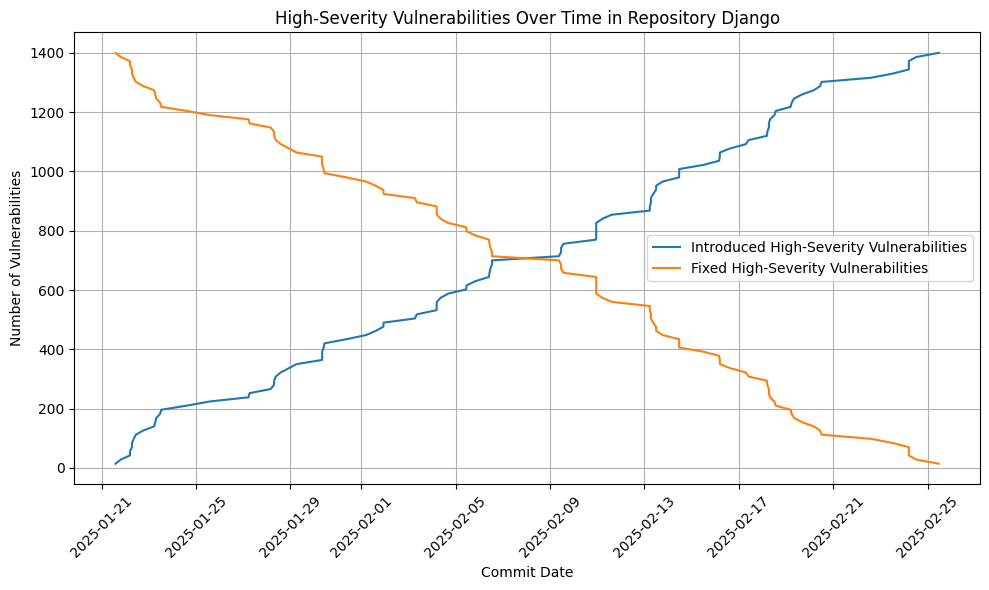

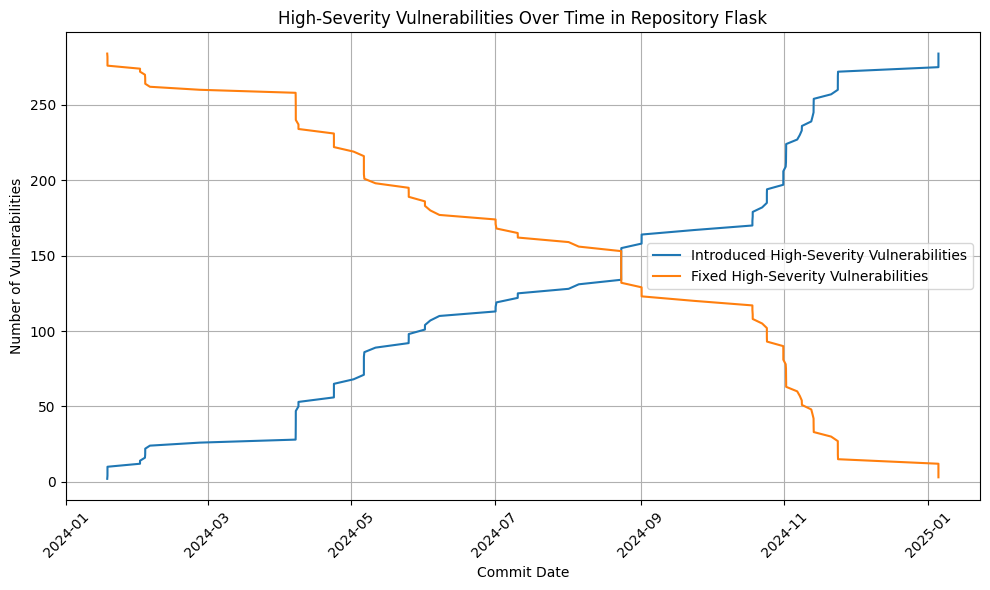

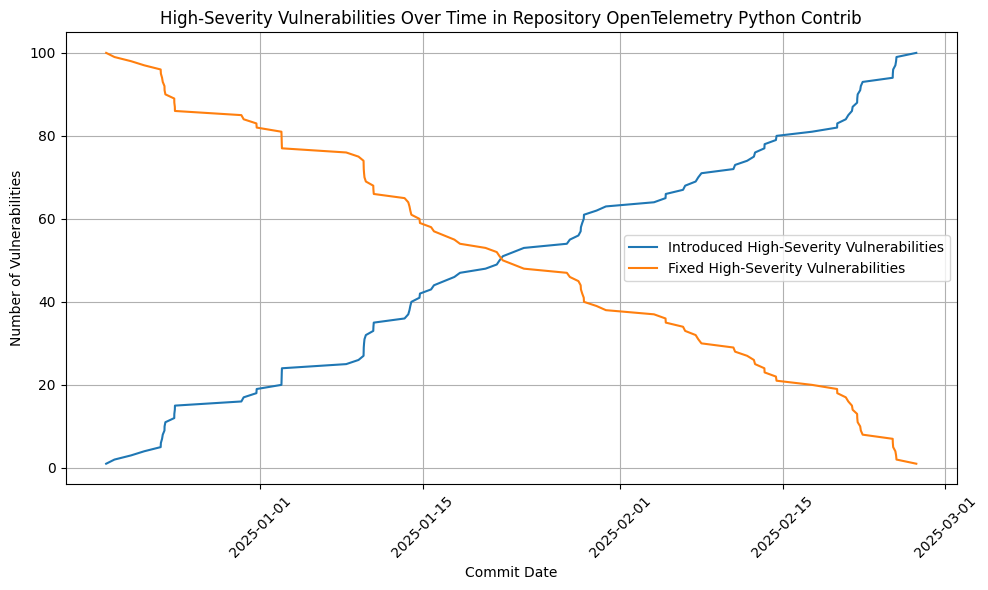

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
repo1 = pd.read_csv('bandit_lab/results/django_results.csv', parse_dates=['commit_date'])
repo2 = pd.read_csv('bandit_lab/results/flask_results.csv', parse_dates=['commit_date'])
repo3 = pd.read_csv('bandit_lab/results/opentelemetry-python-contrib_results.csv', parse_dates=['commit_date'])

# List of repositories
repositories = [repo1, repo2, repo3]

# Function to plot vulnerabilities over time
def plot_vulnerabilities(repo, repo_name):
    repo = repo.sort_values('commit_date')
    repo['cumulative_high'] = repo['high_severity'].cumsum()
    repo['cumulative_fixed'] = repo['high_severity'][::-1].cumsum()[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.plot(repo['commit_date'], repo['cumulative_high'], label='Introduced High-Severity Vulnerabilities')
    plt.plot(repo['commit_date'], repo['cumulative_fixed'], label='Fixed High-Severity Vulnerabilities')
    plt.xlabel('Commit Date')
    plt.ylabel('Number of Vulnerabilities')
    plt.title(f'High-Severity Vulnerabilities Over Time in {repo_name}')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


# Plot for each repository
repo_names = ['Django', 'Flask', 'OpenTelemetry Python Contrib']
for i, repo in enumerate(repositories, 1):
    plot_vulnerabilities(repo, f'Repository {repo_names[i-1]}')


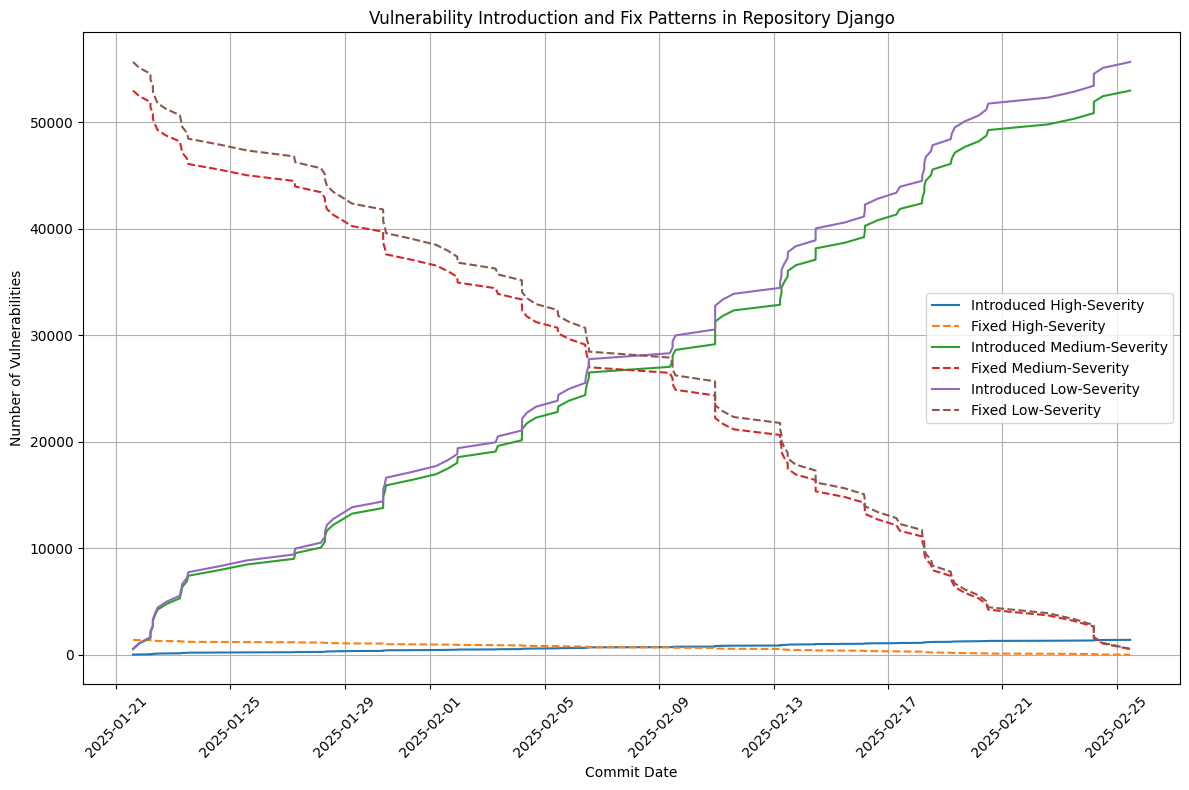

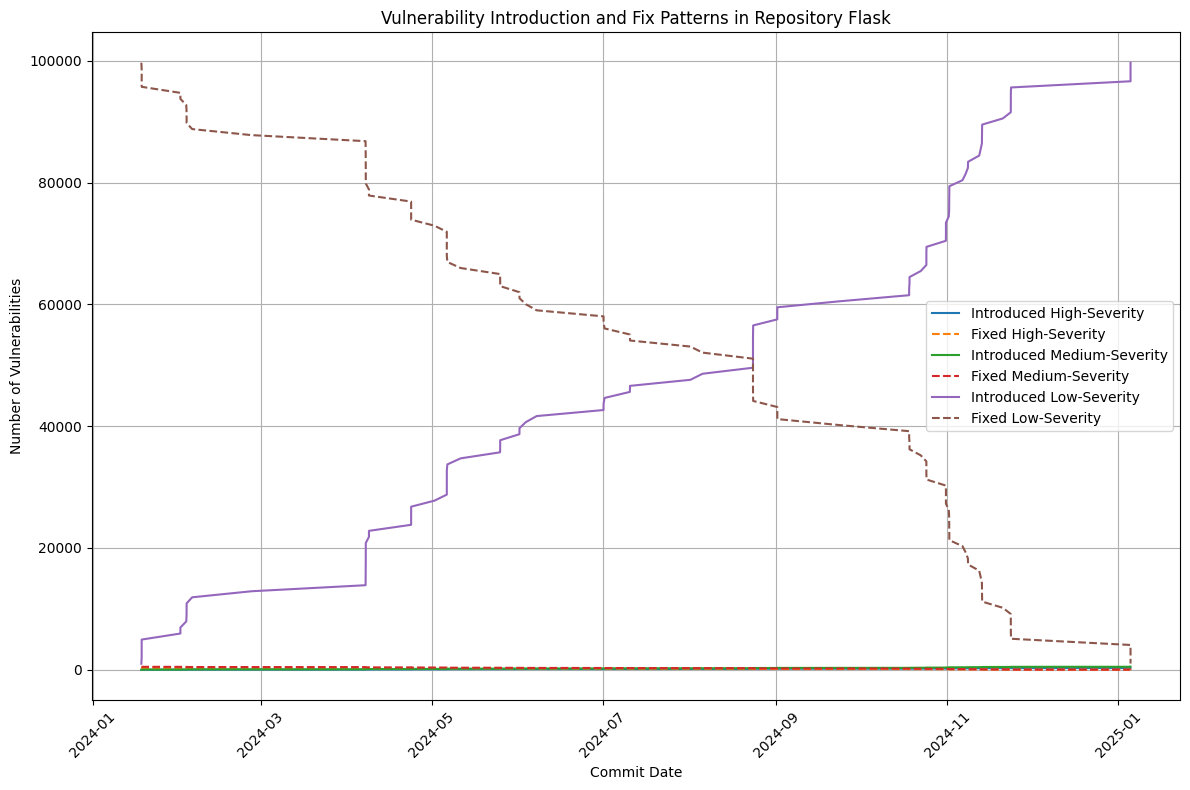

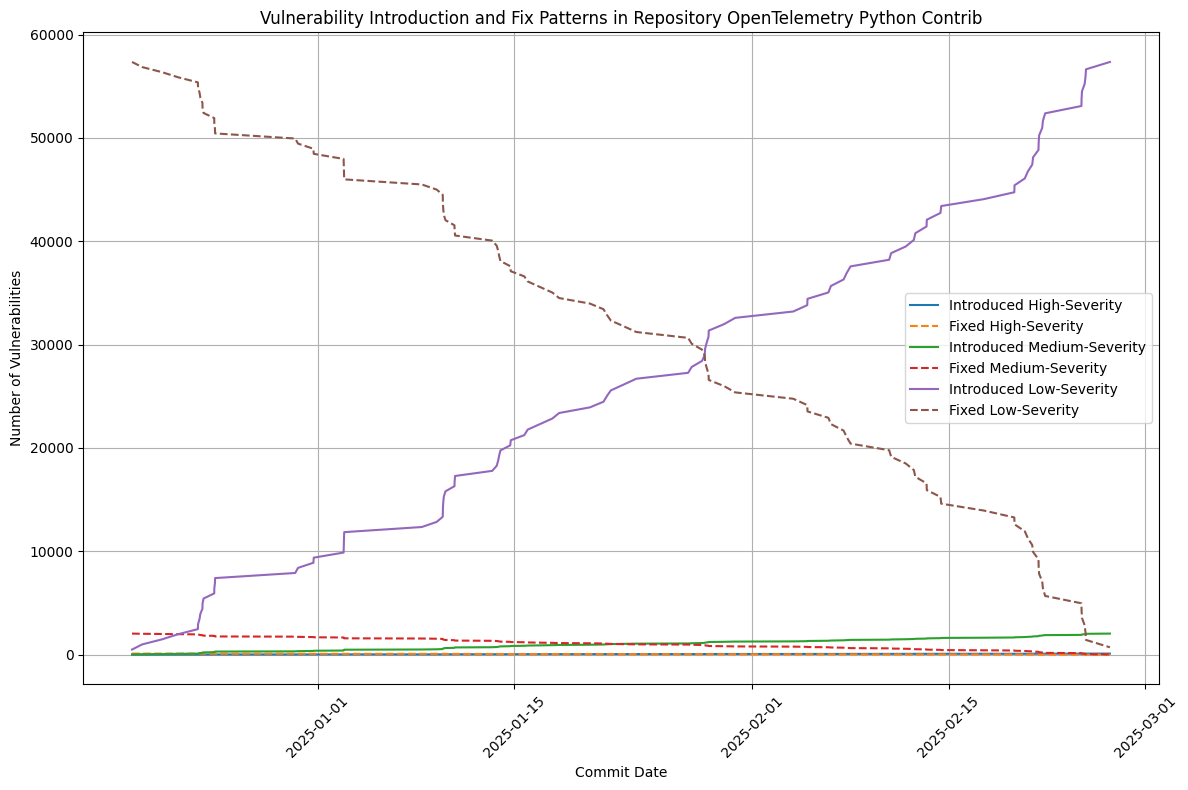

In [11]:
def plot_severity_patterns(repo, repo_name):
    repo = repo.sort_values('commit_date')
    severities = ['high', 'medium', 'low']
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for severity in severities:
        repo[f'cumulative_{severity}'] = repo[f'{severity}_severity'].cumsum()
        repo[f'cumulative_fixed_{severity}'] = repo[f'{severity}_severity'][::-1].cumsum()[::-1]
        
        ax.plot(repo['commit_date'], repo[f'cumulative_{severity}'], label=f'Introduced {severity.capitalize()}-Severity')
        ax.plot(repo['commit_date'], repo[f'cumulative_fixed_{severity}'], label=f'Fixed {severity.capitalize()}-Severity', linestyle='--')
    
    ax.set_xlabel('Commit Date')
    ax.set_ylabel('Number of Vulnerabilities')
    ax.set_title(f'Vulnerability Introduction and Fix Patterns in {repo_name}')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    fig.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Plot for each repository
for i, repo in enumerate(repositories, 1):
    plot_severity_patterns(repo, f'Repository {repo_names[i-1]}')


In [12]:
from collections import Counter

def process_csv(file_path):
    df = pd.read_csv(file_path)
    all_cwes = []
    for cwe_str in df['cwes'].dropna():
        # Split the string by ';' and remove extra spaces
        cwe_list = [c.strip() for c in cwe_str.split(';') if c.strip()]
        all_cwes.extend(cwe_list)
    return Counter(all_cwes)

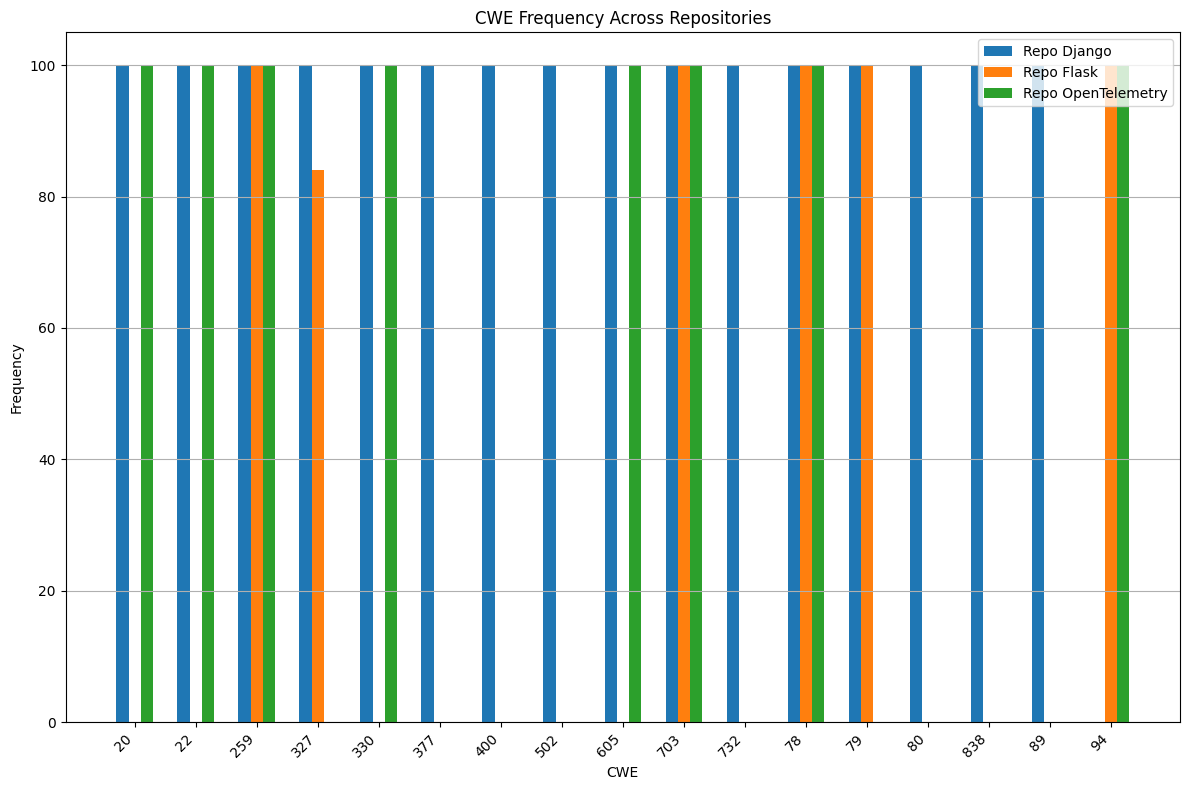

In [13]:
# Process each repository CSV file
cwe_counts_repo1 = process_csv('bandit_lab/results/django_results.csv')
cwe_counts_repo2 = process_csv('bandit_lab/results/flask_results.csv')
cwe_counts_repo3 = process_csv('bandit_lab/results/opentelemetry-python-contrib_results.csv')

# Combine unique CWE values from all repositories
all_cwes = set(cwe_counts_repo1.keys()) | set(cwe_counts_repo2.keys()) | set(cwe_counts_repo3.keys())

# Prepare data for plotting, ensuring each repository has a count for every CWE (default 0)
data = {
    'Repo 1': [cwe_counts_repo1.get(cwe, 0) for cwe in sorted(all_cwes)],
    'Repo 2': [cwe_counts_repo2.get(cwe, 0) for cwe in sorted(all_cwes)],
    'Repo 3': [cwe_counts_repo3.get(cwe, 0) for cwe in sorted(all_cwes)]
}
cwe_list = sorted(all_cwes)
df_counts = pd.DataFrame(data, index=cwe_list)

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.2
x = np.arange(len(df_counts.index))

# Plot bars for each repository
ax.bar(x - bar_width, df_counts['Repo 1'], width=bar_width, label='Repo Django')
ax.bar(x, df_counts['Repo 2'], width=bar_width, label='Repo Flask')
ax.bar(x + bar_width, df_counts['Repo 3'], width=bar_width, label='Repo OpenTelemetry')

# Formatting the plot
ax.set_xlabel('CWE')
ax.set_ylabel('Frequency')
ax.set_title('CWE Frequency Across Repositories')
ax.set_xticks(x)
ax.set_xticklabels(df_counts.index, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y')
plt.tight_layout()
plt.show()


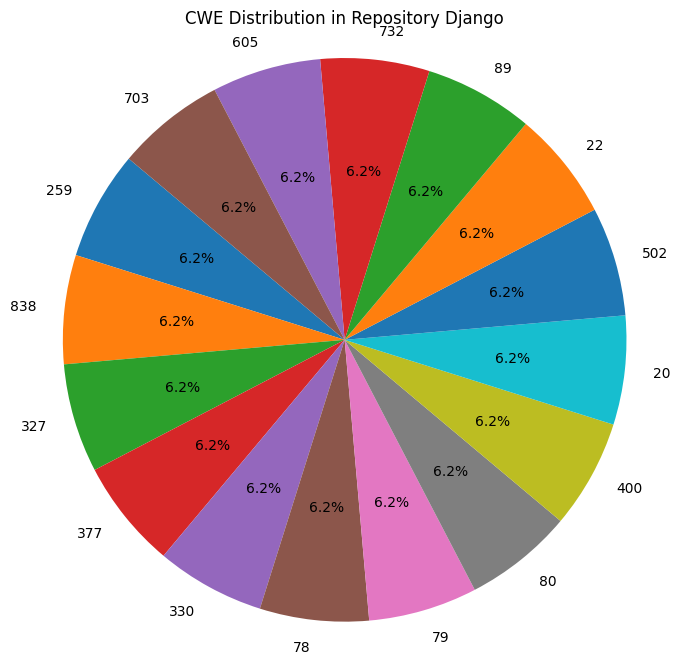

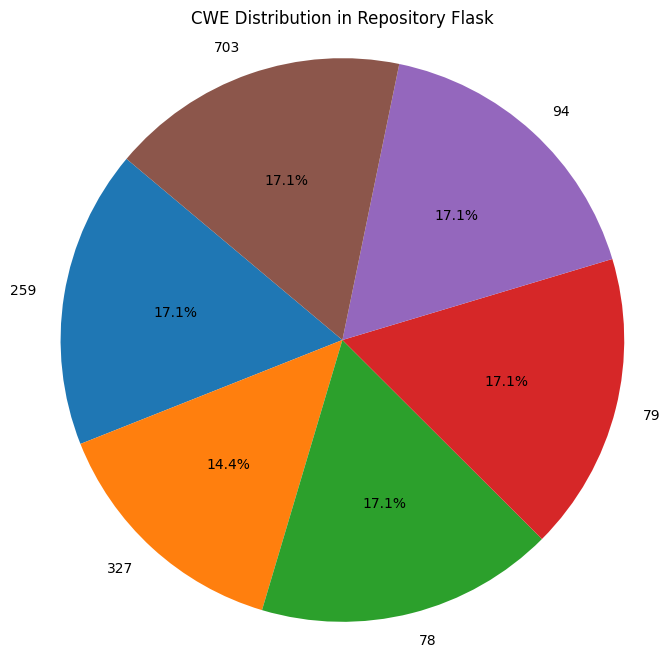

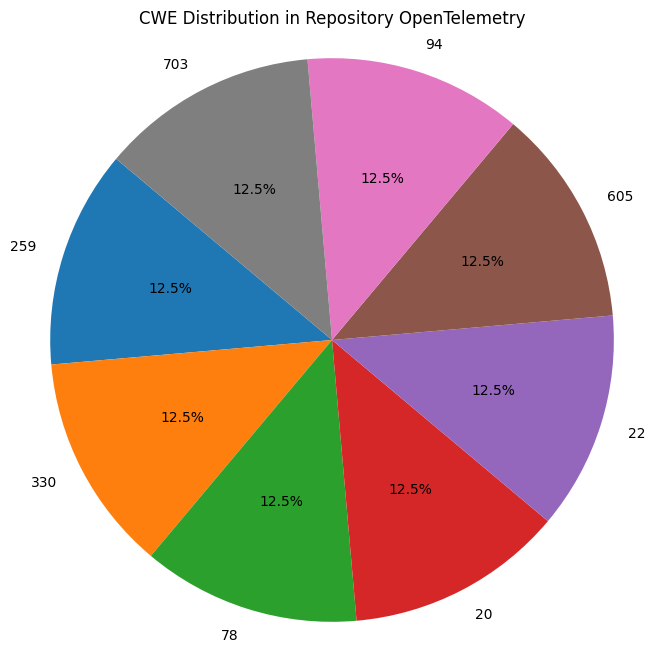

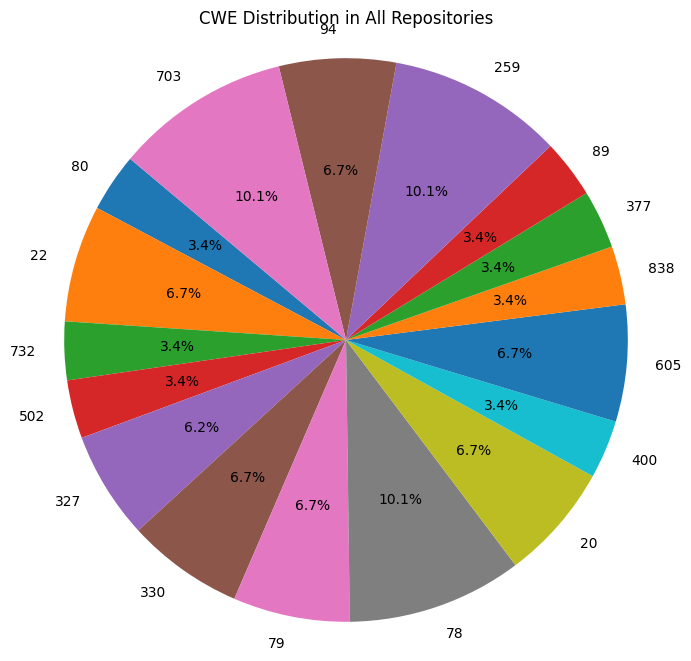

In [16]:
# Generate pie chart of CWE distribution for each repository and a combined pie chart
def plot_cwe_pie_chart(cwe_counts, repo_name):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(cwe_counts.values(), labels=cwe_counts.keys(), autopct='%1.1f%%', startangle=140)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(f'CWE Distribution in {repo_name}')
    plt.show()

# Plot for each repository
plot_cwe_pie_chart(cwe_counts_repo1, 'Repository Django')
plot_cwe_pie_chart(cwe_counts_repo2, 'Repository Flask')
plot_cwe_pie_chart(cwe_counts_repo3, 'Repository OpenTelemetry')
plot_cwe_pie_chart(Counter({cwe: cwe_counts_repo1[cwe] + cwe_counts_repo2[cwe] + cwe_counts_repo3[cwe] for cwe in all_cwes}), 'All Repositories')
